#Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.image import imread
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import glob

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Read

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DatasetProject1/Train_Project1.csv')

In [ ]:
#train_data = train_data.drop(['Unnamed: 0','DateAnswered','DateOfBirth','MainSubject_performance','Exam pass percent','Q/A percentage','UserId'],axis=1)
train_data = train_data.drop(['Unnamed: 0','QuizId'],axis=1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15867850 entries, 0 to 15867849
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   QuestionId           int64  
 1   AnswerId             int64  
 2   IsCorrect            int64  
 3   GroupId              int64  
 4   Gender               int64  
 5   PremiumPupil         float64
 6   SubjectId            int64  
 7   SubjectId_1          int64  
 8   SubjectId_2          int64  
 9   SubjectId_3          float64
 10  SubjectId_4          float64
 11  ParentId             int64  
 12  Level                int64  
 13  Age                  int64  
 14  ExamPreparation      float64
 15  Student performance  float64
dtypes: float64(5), int64(11)
memory usage: 1.9 GB


In [ ]:
train_data.isnull().sum()

QuestionId             0
AnswerId               0
IsCorrect              0
GroupId                0
Gender                 0
PremiumPupil           0
SubjectId              0
SubjectId_1            0
SubjectId_2            0
SubjectId_3            0
SubjectId_4            0
ParentId               0
Level                  0
Age                    0
ExamPreparation        0
Student performance    0
dtype: int64

In [ ]:
#train_data = train_data.fillna({'SubjectId_3':0,'SubjectId_4':0})

In [ ]:
#train_data.to_csv('/content/drive/MyDrive/DatasetProject1/Train_Project1.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15867850 entries, 0 to 15867849
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   QuestionId           int64  
 1   AnswerId             int64  
 2   IsCorrect            int64  
 3   GroupId              int64  
 4   Gender               int64  
 5   PremiumPupil         float64
 6   SubjectId            int64  
 7   SubjectId_1          int64  
 8   SubjectId_2          int64  
 9   SubjectId_3          float64
 10  SubjectId_4          float64
 11  ParentId             int64  
 12  Level                int64  
 13  Age                  int64  
 14  ExamPreparation      float64
 15  Student performance  float64
dtypes: float64(5), int64(11)
memory usage: 1.9 GB


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/DatasetProject1/Test_Project1.csv')

In [ ]:
test_data.isnull().sum()

Unnamed: 0                0
QuestionId                0
AnswerId                  0
IsCorrect                 0
GroupId                   0
Gender                    0
PremiumPupil              0
SubjectId                 0
SubjectId_1               0
SubjectId_2               0
SubjectId_3             723
SubjectId_4            1480
ParentId                  0
Level                     0
Age                       0
ExamPreparation           0
Student performance       0
dtype: int64

In [ ]:
test_data = test_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
test_data = test_data.fillna({'SubjectId_3':0,'SubjectId_4':0})

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   QuestionId           int64  
 1   AnswerId             int64  
 2   IsCorrect            int64  
 3   GroupId              int64  
 4   Gender               int64  
 5   PremiumPupil         float64
 6   SubjectId            int64  
 7   SubjectId_1          int64  
 8   SubjectId_2          int64  
 9   SubjectId_3          float64
 10  SubjectId_4          float64
 11  ParentId             int64  
 12  Level                int64  
 13  Age                  int64  
 14  ExamPreparation      float64
 15  Student performance  float64
dtypes: float64(5), int64(11)
memory usage: 854.5 MB


In [ ]:
train_data = train_data.sample(n=5000000, random_state=1)

In [ ]:
x_train = train_data.drop('IsCorrect', axis=1)
y_train = train_data['IsCorrect']
x_test = test_data.drop('IsCorrect', axis=1)
y_test = test_data['IsCorrect']

#Featuers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e1a1e5ed0>]],
      dtype=object)

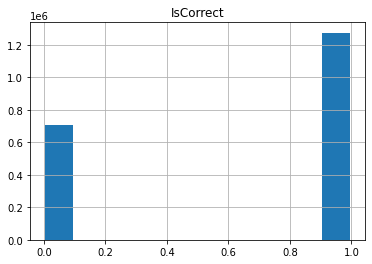

In [ ]:
test_data.hist(column= 'IsCorrect', rwidth = 0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e1a19be90>]],
      dtype=object)

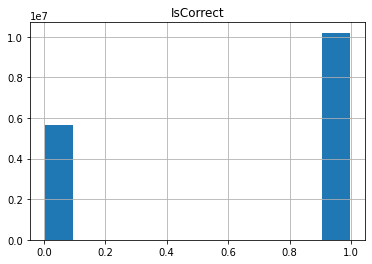

In [ ]:
train_data.hist(column= 'IsCorrect', rwidth = 0.9)

In [ ]:
#balance the data
#Process unbalance data
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
undersample = NearMiss(version=1, n_neighbors=3)
x_train, y_train = undersample.fit_resample(x_train, y_train)
#x_train, y_train = oversample.fit_resample(x_train, y_train)
y_train.hist( columns = 'IsCorrect', rwidth = 0.9)

#gain

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train) 
fs_support = fs.get_support()
fs_feature = x_train.loc[:, fs_support].columns.tolist()
fs_feature = list(fs_feature)
# information gain for each column
print ('information gain from feature selection')
for i in range(len(fs.scores_)):
  print(fs_feature[i], ':', fs.scores_[i])

#Select Featuer

In [ ]:
# get the first highest 5 features resulted from info gain
fs = SelectKBest(score_func=mutual_info_classif, k=5)
fs.fit(x_train, y_train)
fs_support = fs.get_support()
fs_feature = x_train.loc[:, fs_support].columns.tolist()
fs_feature = list(fs_feature)
print(fs_feature)

In [ ]:
x_features = x_train[fs_feature]
x_features.head()

In [ ]:
# Create Dummy variables
x_features = pd.get_dummies(x_features, drop_first=True)
x_features.head()

In [ ]:
#NOOOOO
# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
x_features['QuestionId'] = scalar_.fit_transform(x_features[['QuestionId']])
x_features['UserId'] = scalar_.fit_transform(x_features[['UserId']])
x_features['GroupId'] = scalar_.fit_transform(x_features[['GroupId']])
x_features['QuizId'] = scalar_.fit_transform(x_features[['GroupId']])
x_features['SubjectId'] = scalar_.fit_transform(x_features[['SubjectId']])
x_features['SubjectId_2'] = scalar_.fit_transform(x_features[['SubjectId_2']])
x_features['SubjectId_3'] = scalar_.fit_transform(x_features[['SubjectId_3']])
x_features['SubjectId_4'] = scalar_.fit_transform(x_features[['SubjectId_4']])


x_features.head()

,QuestionId,UserId,GroupId,QuizId,Gender,SubjectId,SubjectId_2,SubjectId_3,SubjectId_4,Level
0,0.400822,0.188633,-0.180120,-0.180120,1,0.385050,1.788780,0.567512,0.535036,2
1,0.264567,-0.276757,-0.195075,-0.195075,1,-0.234907,-0.675426,-0.690605,-0.169596,3
2,-1.518297,1.324601,0.513989,0.513989,1,-0.258570,-0.675426,1.067312,-0.196491,3
3,1.140943,-1.101268,-0.558991,-0.558991,1,-0.272767,-0.675426,1.067312,-0.212627,3
4,-1.558195,1.311474,-0.951938,-0.951938,1,-0.163920,-0.675426,-0.742308,-0.088913,3


In [ ]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_valid_split
x_train, x_val, y_train, y_val = \
train_valid_split(x, y, valid_size = 0.3, random_state = 1234, stratify=y)

#Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = (lr.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
#scores = cross_val_score(lr, x_train, y_train, cv=5)

# this two lines below for the roc later 
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_predict)
auc_lr = auc(fpr_lr, tpr_lr)

# Results
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)
#print('Cross-Validation Accuracy Scores', scores)


confusion_matrix [[      0 2564550]
 [      0 4435450]]
accuracy 0.6336357142857143
recall 1.0
precision 0.6336357142857143
f1 0.7757368533813711


<function matplotlib.pyplot.show>

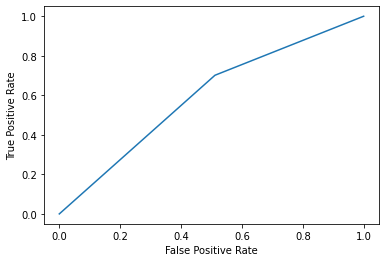

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_predict)
auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

In [ ]:
import pickle
filename = '/content/drive/MyDrive/DatasetProject1/LR_15model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

#Naive Bayes

In [ ]:
''' below is to train Naive Bayes algorithm and get the accuracy and confusion matrix'''
from sklearn.metrics import confusion_matrix, recall_score, classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
nb = GaussianNB()
nb.fit(x_train, y_train)
y_predict = (nb.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_predict)
auc_nb = auc(fpr_nb, tpr_nb)

# Results
print ('NB results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

NB results
confusion_matrix [[  35302 2529248]
 [  48880 4386570]]
accuracy 0.631696
recall 0.9889796976631458
precision 0.6342807170460529
f1 0.7728775322721655


<function matplotlib.pyplot.show>

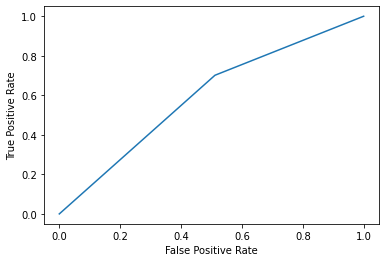

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_predict)
auc_nb = auc(fpr_nb, tpr_nb)

plt.plot(fpr_nb, tpr_lr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

#Decision Tree

In [ ]:
''' below is to train Decision Tree algorithm and get the accuracy and confusion matrix'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, classification_report, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
dt1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, )

dt1.fit(x_train, y_train)
y_predict = (dt1.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
#fpr_dt1, tpr_dt1, thresholds_dt1 = roc_curve(y_test, y_predict)
#auc_dt1 = auc(fpr_nb, tpr_dt1)

# Results
print ('Decision Tree results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

Decision Tree results
confusion_matrix [[1532587 1031963]
 [1583289 2852161]]
accuracy 0.6263925714285714
recall 0.6430375722869156
precision 0.734312550268735
f1 0.6856507316360189


In [ ]:
''' below is to train Decision Tree algorithm and get the accuracy and confusion matrix'''
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=20, min_samples_split=2, min_samples_leaf=1, \
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, \
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

dt2.fit(x_train, y_train)
y_predict = (dt2.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test, y_predict)
auc_dt2 = auc(fpr_dt2, tpr_dt2)

# Results
print ('Decision Tree results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

Decision Tree results
confusion_matrix [[1277854 1286696]
 [1175241 3260209]]
accuracy 0.6482947142857143
recall 0.7350345511729363
precision 0.7170171798179201
f1 0.7259140837786973


<function matplotlib.pyplot.show>

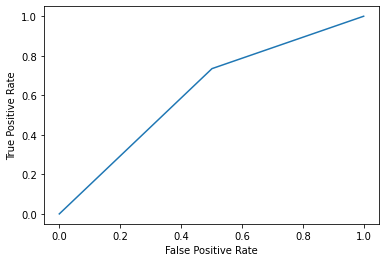

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test, y_predict)
auc_dt2 = auc(fpr_dt2, tpr_dt2)

plt.plot(fpr_dt2, tpr_dt2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10)

dt3.fit(x_train, y_train)
y_predict = (dt3.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
#fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test, y_predict)
#auc_dt2 = auc(fpr_nb, tpr_dt2)

# Results
print ('Decision Tree results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

Decision Tree results
confusion_matrix [[1225277 1339273]
 [1122484 3312966]]
accuracy 0.6483204285714286
recall 0.746928947457417
precision 0.7121229154392111
f1 0.7291107783287919


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

trainData = train_data.sample(n=10000, random_state=1,replace=True) 
testData = test_data.sample(n=10000, random_state=1,replace=True)

x_train = trainData.drop('IsCorrect', axis=1)
y_train = trainData['IsCorrect']

x_test = testData.drop('IsCorrect', axis=1)
y_test = testData['IsCorrect']

svm1 = SVC(C=0.01, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
                tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
                 random_state=None)
svm1.fit(x_train, y_train)
y_predict = (svm1.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
# this two lines below for the roc later 
fpr_svm1, tpr_svm1, thresholds_svm1 = roc_curve(y_test, y_predict)
auc_nb = auc(fpr_svm1, tpr_svm1)
# Results
print ('svm1 results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

svm1 results
confusion_matrix [[   0 3611]
 [   0 6389]]
accuracy 0.6389
recall 1.0
precision 0.6389
f1 0.7796692903776924


<function matplotlib.pyplot.show>

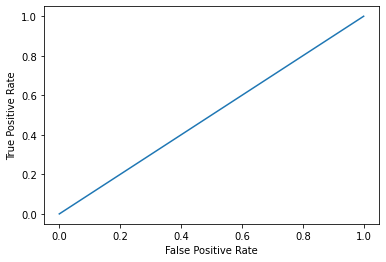

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_svm1, tpr_svm1, thresholds_svm1 = roc_curve(y_test, y_predict)
auc_nb = auc(fpr_svm1, tpr_svm1)

plt.plot(fpr_svm1, tpr_svm1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

#Random Forest

In [ ]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
# this is the basic random forest please read from the link below to answer the teacher task.
rf = RandomForestClassifier(n_estimators=20)

rf.fit(x_train, y_train)
y_predict = (rf.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predict)
auc_rf = auc(fpr_rf, tpr_rf)

# Results
print ('Random Forest results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)


Random Forest results
confusion_matrix [[1334061 1230489]
 [1242932 3192518]]
accuracy 0.6466541428571428
recall 0.7197731909952767
precision 0.72179808894718
f1 0.7207842178383888


<function matplotlib.pyplot.show>

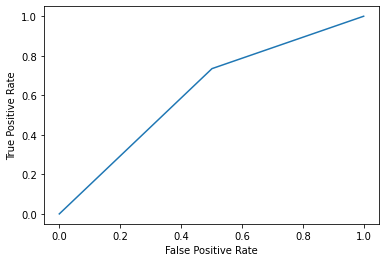

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predict)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

In [ ]:
# Random Forest with Grid search
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#parameter Grid
param_grid = {'n_estimators': [20, 50],'max_features': [ 'sqrt', 10], 'max_depth' : [4,8], 'criterion' :['gini', 'entropy']}
rf1_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
rf1_model.fit(x_train, y_train)
rf1_model.best_params_
rf1_model_y_predicted = (rf1_model.predict(x_test) )
rf1_model_conf_mat = confusion_matrix(y_test, rf1_model_y_predicted)
print("rf1 Model confusion matrix: ", rf1_model_conf_mat)
print("rf1 Model TP: ", rf1_model_conf_mat[0,0])
print("rf1 Model FP: ", rf1_model_conf_mat[0,1])
print("rf1 Model FN: ", rf1_model_conf_mat[1,0])
print("rf1 Model TN: ", rf1_model_conf_mat[1,1])
print("Accuracy: {}".format(accuracy_score(rf1_model_y_predicted, y_test)))

print("Precision score: {}".format(precision_score(y_test,rf1_model_y_predicted)))

print("Recall score: {}".format(recall_score(y_test,rf1_model_y_predicted)))

rf1 Model confusion matrix:  [[  65549 2431709]
 [  50852 4451890]]
rf1 Model TP:  65549
rf1 Model FP:  2431709
rf1 Model FN:  50852
rf1 Model TN:  4451890
Accuracy: 0.6453484285714286
Precision score: 0.6467387190915682
Recall score: 0.9887064370998827


#GradianBoosting

In [ ]:
#  with Grid search
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#parameter Grid
param_grid = {'n_estimators': [20, 40],'max_features': ['auto', 'sqrt'], 'max_depth' : [4,5], }

gb_model = GridSearchCV(GradientBoostingClassifier(),param_grid=param_grid)
gb_model.fit(x_train, y_train)
gb_model.best_params_
gb_model_y_predicted = (gb_model.predict(x_test) )
gb_model_conf_mat = confusion_matrix(y_test, gb_model_y_predicted)
print("gb Model confusion matrix: ", gb_model_conf_mat)
print("gb Model TP: ", gb_model_conf_mat[0,0])
print("gb Model FP: ", gb_model_conf_mat[0,1])
print("gb Model FN: ", gb_model_conf_mat[1,0])
print("gb Model TN: ", gb_model_conf_mat[1,1])
print("Accuracy: {}".format(accuracy_score(gb_model_y_predicted, y_test)))

print("Precision score: {}".format(precision_score(y_test,gb_model_y_predicted)))

print("Recall score: {}".format(recall_score(y_test,gb_model_y_predicted)))

#BaggingClassifier with decision trees

In [ ]:
# BaggingClassifier with decision trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, classification_report, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Bagging_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                          n_estimators = 50,
                          random_state = 5)

Bagging_dt.fit(x_train, y_train)
y_predict = (Bagging_dt.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_Bagging_dt, tpr_Bagging_dt, thresholds_Bagging_dt = roc_curve(y_test, y_predict)
auc_Bagging_dt = auc(fpr_Bagging_dt, tpr_Bagging_dt)

# Results
print ('Bagging Decision Tree results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

#BaggingClassifier with Naïve bayes

In [ ]:
# BaggingClassifier with Naïve bayes
from sklearn.metrics import confusion_matrix, recall_score, classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier

Bagging_nb = BaggingClassifier(base_estimator = GaussianNB(),
                          n_estimators = 20,
                          random_state = 5)

Bagging_nb.fit(x_train, y_train)
y_predict = (Bagging_nb.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_Bagging_nb, tpr_Bagging_nb, thresholds_Bagging_nb = roc_curve(y_test, y_predict)
auc_Bagging_nb = auc(fpr_Bagging_nb, tpr_Bagging_nb)

# Results
print ('Bagging NB results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

Bagging NB results
confusion_matrix [[  35487 2529063]
 [  49066 4386384]]
accuracy 0.6316958571428571
recall 0.9889377627974614
precision 0.6342878486379839
f1 0.7728700207569499


<function matplotlib.pyplot.show>

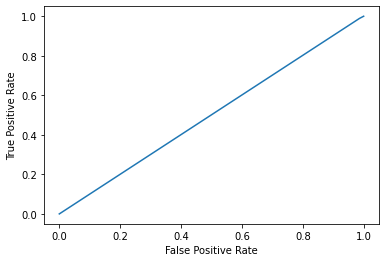

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_Bagging_nb, tpr_Bagging_nb, thresholds_Bagging_nb = roc_curve(y_test, y_predict)
auc_Bagging_nb = auc(fpr_Bagging_nb, tpr_Bagging_nb)

plt.plot(fpr_Bagging_nb, tpr_Bagging_nb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

#XG Boosting

In [ ]:

from sklearn.metrics import confusion_matrix, recall_score, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_predict = (xgb.predict(x_test) )
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
#fpr_Bagging_nb, tpr_Bagging_nb, thresholds_Bagging_nb = roc_curve(Y_test, Y_predict)
#auc_Bagging_nb = auc(fpr_Bagging_nb, tpr_Bagging_nb)

# Results
print ('XG Boosting results')
print('confusion_matrix', cm)
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

#Stacking

In [ ]:
# Use Ensembling method to improve the results
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

estimators = [('dt', DecisionTreeClassifier()),\
              ('nb', GaussianNB())]
              
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(x_train, y_train)
y_predict = (stacking.predict(x_test))
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score(y_test, y_predict)
re = recall_score(y_test, y_predict)
pr = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

# this two lines below for the roc later 
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_predict)
auc_stacking = auc(fpr_stacking, tpr_stacking)

# Results
print ('stacking results')
print('confusion_matrix', cm) 
print('accuracy', ac)
print ('recall', re)
print ('precision', pr)
print ('f1', f1)

stacking results
confusion_matrix [[1252806 1311744]
 [1324089 3111361]]
accuracy 0.6234524285714286
recall 0.7014758367245714
precision 0.7034336738558095
f1 0.7024533911004673


<function matplotlib.pyplot.show>

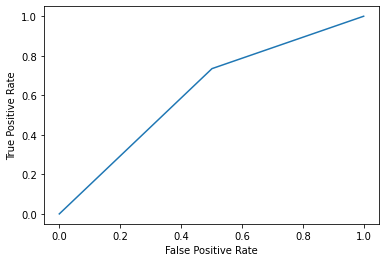

In [ ]:
#  build roc curve
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_predict)
auc_stacking = auc(fpr_stacking, tpr_stacking)

plt.plot(fpr_stacking, tpr_stacking)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show